Автор: Лейман Максим  

Дата создания: 18.06.2025

# Промежуточная аттестация 4.  

## Детекция лиц



In [1]:
!ls dataset/dataset_detect_2/

images	labels


# Импорты

In [2]:
from train.trainer import train
from data.dataset import FaceKeypointsDataset, annotation_transform, rename_images_and_update_csv, convert_xml_to_csv_with_renaming
from utils.visualization import img_show, show_batch_with_keypoints, show_image_with_predictions, show_original_image_with_predictions, empty_cache, detect_and_visualize
from models.keypoint_net import KeypointNet



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage import io
import torch
from torch.utils.data import Dataset, DataLoader

import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as TF
import matplotlib.patches as patches





/home/maksim/anaconda3/envs/myenv3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1) Датасет

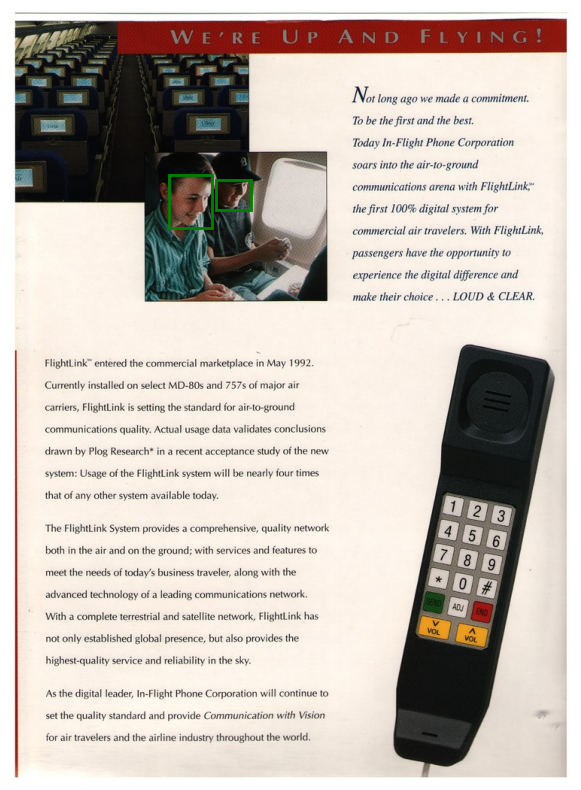

In [3]:
image_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/train/ffec2a724ad5cb71.jpg"
label_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/train/ffec2a724ad5cb71.txt"
detect_and_visualize(image_path, label_path=label_path,  model=None)



# 2) Модель


image 1/1 /home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/train/ffec2a724ad5cb71.jpg: 640x480 2 persons, 1 remote, 1 book, 47.3ms
Speed: 1.6ms preprocess, 47.3ms inference, 88.1ms postprocess per image at shape (1, 3, 640, 480)


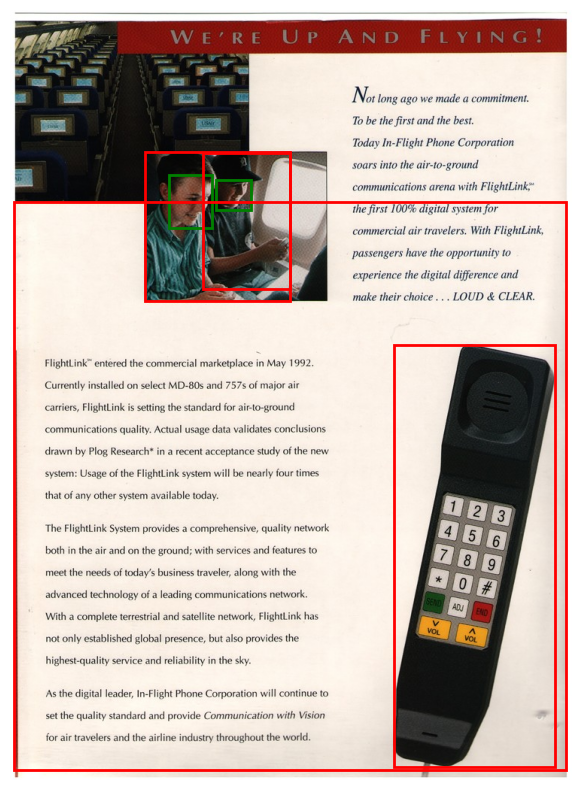

In [4]:
from ultralytics import YOLO
model = YOLO("models/yolo11n.pt")  
image_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/train/ffec2a724ad5cb71.jpg"
label_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/train/ffec2a724ad5cb71.txt"
# image_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/val/fffa75be661899f2.jpg"
# label_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/val/fffa75be661899f2.txt"
detect_and_visualize(image_path, label_path=label_path,  model=model)

# 3) Тренировка

In [5]:
model = YOLO("models/yolo.pt")

# ['auto', 'Adam', 'SGD', 'AdamW', 'Adamax', 'NAdam', 'RAdam']
from IPython.display import clear_output
model.half();
empty_cache()

torch.cuda.empty_cache()

for opt in ['AdamW']:
    for mosaic in [0.7]:
        for lr00 in [0.00003]:
            for iou0 in [0.5]:
                for batch in [20]:
                    # Очистка экрана перед каждой новой тренировкой
                    os.system('cls' if os.name == 'nt' else 'clear') 
                    clear_output(wait=True)  

                    print(f"Запуск тренировки: opt={opt}, batch={batch}, mosaic={mosaic}, lr0={lr00}, iou={iou0}")
                    
                    model.train(
                        data="data.yaml",
                        epochs=10,
                        imgsz=736,
                        batch=batch,
                        device="cuda",
                        lr0=lr00,
                        lrf=0.1,
                        cos_lr=True,
                        momentum=0.951,
                        weight_decay=0.01,
                        optimizer=opt,
                        cache=None,
                        max_det=290,            # максимальное количество детектируемых объектов        
                        single_cls=False,
                        patience=2,
                        verbose=True,
                        dropout=0.3,
                        freeze=0,
                        iou=iou0,  
                        half=True,          # 16-битная (FP16) арифметика
                        workers=0,
                        mosaic=mosaic,
                        close_mosaic=10,
                        multi_scale=False,  # разные размеры
                        mixup=0.15,         # Смешивание изображений в одно
                        copy_paste=0.2,     # Вставка объекта с другого изображения  
                        translate=0.05,     #  сдвиг xy
                        scale=0.1,  
                        exist_ok=True,       # Перезаписывать модель
                        warmup_epochs=3.0,    # количество эпох на разогрев  
                        fliplr=0.3,           # переворот по горизонтали
                        hsv_v=0.2,      #  Яркость
                        hsv_s=0.2,      # Насыщенность
                        hsv_h=0.02,     # Оттенок
                        bgr=0.05,       #  смена каналов
                        amp= True,         # Смешанная точность
                        fraction=1.0,      # используемая доля обучающих данных
                        val=True,
                        plots=True,
                  
                    )

                  



Запуск тренировки: opt=AdamW, batch=20, mosaic=0.7, lr0=3e-05, iou=0.5
Ultralytics 8.3.158 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=20, bgr=0.05, box=7.5, cache=None, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.3, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.3, flipud=0.0, format=torchscript, fraction=1.0, freeze=0, half=True, hsv_h=0.02, hsv_s=0.2, hsv_v=0.2, imgsz=736, int8=False, iou=0.5, keras=False, kobj=1.0, line_width=None, lr0=3e-05, lrf=0.1, mask_ratio=4, max_det=290, mixup=0.15, mode=train, model=models/yolo.pt, momentum=0.951, mosaic=0.7, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, p

train: Scanning /home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/train.cache... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6535.6±2423.0 MB/s, size: 308.9 KB)


val: Scanning /home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: AdamW(lr=3e-05, momentum=0.951) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.009375000000000001), 87 bias(decay=0.0)
Image sizes 736 train, 736 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.66G      1.154     0.6375      1.061         17        736: 100%|██████████| 670/670 [04:51<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.80it/s]

                   all       3347      10299      0.886       0.77      0.852      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10      5.66G       1.12     0.5817      1.043         15        736: 100%|██████████| 670/670 [04:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.82it/s]


                   all       3347      10299      0.893      0.787      0.866      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.69G      1.104     0.5545       1.03         11        736: 100%|██████████| 670/670 [04:45<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:30<00:00,  2.80it/s]


                   all       3347      10299      0.896        0.8      0.879      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.69G      1.092     0.5383      1.027         25        736: 100%|██████████| 670/670 [04:49<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:30<00:00,  2.75it/s]

                   all       3347      10299      0.896      0.802       0.88      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.69G      1.089     0.5352      1.023         21        736: 100%|██████████| 670/670 [04:50<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.81it/s]


                   all       3347      10299      0.889      0.808       0.88      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       5.7G      1.086     0.5328      1.023         13        736: 100%|██████████| 670/670 [04:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.83it/s]


                   all       3347      10299      0.893      0.805      0.881      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       5.7G      1.083      0.532      1.023         21        736: 100%|██████████| 670/670 [04:45<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.80it/s]


                   all       3347      10299      0.898      0.802      0.881      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       5.7G      1.085     0.5316      1.022         22        736: 100%|██████████| 670/670 [04:44<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.88it/s]


                   all       3347      10299      0.896      0.802       0.88      0.584
EarlyStopping: Training stopped early as no improvement observed in last 2 epochs. Best results observed at epoch 6, best model saved as best.pt.
To update EarlyStopping(patience=2) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

8 epochs completed in 0.706 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12029MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 84/84 [00:29<00:00,  2.86it/s]


                   all       3347      10299      0.892      0.805      0.881      0.584
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


#  Работа модели детекции точек


image 1/1 /home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/train/ffec2a724ad5cb71.jpg: 736x544 2 faces, 47.5ms
Speed: 1.5ms preprocess, 47.5ms inference, 0.8ms postprocess per image at shape (1, 3, 736, 544)


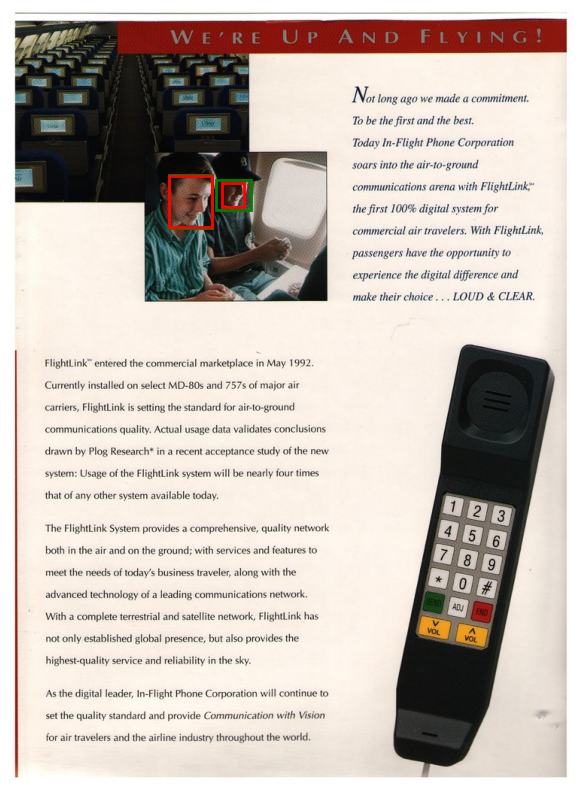

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from ultralytics import YOLO
model = YOLO("models/yolo.pt")
 
image_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/train/ffec2a724ad5cb71.jpg"
label_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/train/ffec2a724ad5cb71.txt"
# image_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/images/val/fffa75be661899f2.jpg"
# label_path = "/home/maksim/develops/python/MAKSIM/DL/attestation_4/dataset/dataset_detect_2/labels/val/fffa75be661899f2.txt"
detect_and_visualize(image_path, label_path=label_path,  model=model)